# Análisis exploratorio de los datos

In [67]:
import pandas as pd
import numpy as np
from ast import literal_eval
pd.options.display.max_colwidth=400

In [68]:
df = pd.read_csv('cinemagix-movies.csv')

In [69]:

df[df['YearOfRelease']>2000].sort_values(by=['YearOfRelease','MovieRating'], ascending=[False,False])

,MovieName,YearOfRelease,RunTime,MovieRating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
31,Spider-Man: Across the Spider-Verse,2023,140,8.7,270500,86.0,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Joaquim Dos Santos', 'Kemp Powers', 'Justin K. Thompson']","['Shameik Moore', 'Hailee Steinfeld', 'Brian Tyree Henry', 'Luna Lauren Velez']","['Miles', 'Morales', 'catapults', 'across', 'the', 'Multiverse,', 'where', 'he', 'encounters', 'a', 'team', 'of', 'Spider-People', 'charged', 'with', 'protecting', 'its', 'very', 'existence.', 'When', 'the', 'heroes', 'clash', 'on', 'how', 'to', 'handle', 'a', 'new', 'threat,', 'Miles', 'must', 'redefine', 'what', 'it', 'means', 'to', 'be', 'a', 'hero.']"
49,Oppenheimer,2023,180,8.6,451781,88.0,NaN,"['Biography', ' Drama', ' History']",R,['Christopher Nolan'],"['Cillian Murphy', 'Emily Blunt', 'Matt Damon', 'Robert Downey Jr.']","['The', 'story', 'of', 'American', 'scientist,', 'J.', 'Robert', 'Oppenheimer,', 'and', 'his', 'role', 'in', 'the', 'development', 'of', 'the', 'atomic', 'bomb.']"
153,Fukrey 3,2023,147,8.3,19540,NaN,NaN,"['Comedy', ' Crime', ' Drama']",NaN,['Mrighdeep Lamba'],"['Pulkit Samrat', 'Varun Sharma', 'Manjot Singh', 'Richa Chadha']","['The', 'friends', 'facing', 'disastrously', 'funny', 'situations', 'together', 'and', 'having', 'each', ""other's"", 'backs', 'through', 'the', 'trenches', 'to', 'make', 'it', 'out', 'of', 'a', 'new', 'mess', 'this', 'time.']"
229,The Vaccine War,2023,161,8.2,19593,NaN,NaN,"['Drama', ' Thriller']",NaN,['Vivek Agnihotri'],"['Nivedita Bhattacharya', 'Anupam Kher', 'Nana Patekar', 'Girija Oak']","['Based', 'on', ""India's"", 'battle', 'against', 'Covid-19,', 'and', 'the', 'efforts', 'the', 'medical', 'department', 'took', 'to', 'overcome', 'the', 'global', 'crisis.']"
479,Checkmate,2023,112,8.1,23860,NaN,NaN,"['Action', ' Comedy']",18+,"['Akriti Bajpai', 'Harsh Beniwal']","['Harsh Beniwal', 'Mohit Chhikara', 'Aditya Paul', 'Vishal Vashishtha']","['An', 'assassin', 'gets', 'hired', 'for', 'a', 'job', 'that', 'throws', 'him', 'in', 'a', 'murky', 'pool', 'of', 'mishaps,', 'eventually', 'leading', 'to', 'a', 'baffling', 'secret.']"
...,...,...,...,...,...,...,...,...,...,...,...,...
9816,Summer Catch,2001,104,5.1,16477,21.0,19690000.0,"['Comedy', ' Drama', ' Romance']",PG-13,['Michael Tollin'],"['Freddie Prinze Jr.', 'Jessica Biel', 'Fred Ward', 'Matthew Lillard']","['A', 'rich', 'girl', 'whose', 'family', 'summers', 'on', 'Cape', 'Cod', 'has', 'a', 'romance', 'with', 'a', 'local', 'poor', 'boy', 'who', 'hopes', 'to', 'become', 'a', 'major', 'league', 'baseball', 'player.']"
9918,Say It Isn't So,2001,95,5.0,13629,21.0,5520000.0,"['Comedy', ' Romance']",R,['J.B. Rogers'],"['Chris Klein', 'Heather Graham', 'Orlando Jones', 'Sally Field']","['Jo', 'and', 'Gilly', 'date.', 'They', 'find', 'out', ""they're"", 'brother', 'and', 'sister.', 'Jo', 'moves', 'away.', 'Gilly', 'finds', 'out', 'that', ""he's"", 'not', ""Jo's"", 'brother', 'and', 'that', ""Jo's"", 'getting', 'married.', 'Can', 'he', 'stop', 'the', 'wedding', 'in', 'time?']"
9949,Ghosts of Mars,2001,98,4.9,56683,35.0,8430000.0,"['Action', ' Horror', ' Sci-Fi']",R,['John Carpenter'],"['Natasha Henstridge', 'Ice Cube', 'Pam Grier', 'Jason Statham']","['In', '2176,', 'a', 'Martian', 'police', 'unit', 'is', 'sent', 'to', 'pick', 'up', 'a', 'highly', 'dangerous', 'criminal', 'at', 'a', 'remote', 'mining', 'post.', 'Upon', 'arrival,', 'the', 'cops', 'find', 'that', 'the', 'post', 'has', 'become', 'a', 'charnel', 'house.']"
9958,Valentine,2001,96,4.9,29586,18.0,20380000.0,"['Horror', ' Mystery', ' Thriller']",R,['Jamie Blanks'],"['Denise Richards', 'David Boreanaz', 'Marley Shelton', 'Jessica Capshaw']","['Five', 'women', 'are', 'stalked', 'by', 'an', 'unknown', 'assailant', 'while', 'preparing', 'for', ""Valentine's"", 'Day.']"


# Catégorias

In [70]:
genres=[]
# esta parte es compleja ya que aveces pandas no reconoce la lista como tal sino como string, por ende esta parte lo que hace modificar el valor si es un string a una lista, en caso contrario no hace nada
def modificar_fila(item):
    if isinstance(item, str):
        item=literal_eval(item)
        item=[genre.replace("' ","'").replace("'","").strip(" ") for genre in item]
        recolectar_generos(item)
        return item
    else :
        item=[genre.replace("' ","'").replace("'","").strip(" ") for genre in item]
        recolectar_generos(item)
        return item
# sirve para recolectar los generos en un array y agregar estos generos al df
def recolectar_generos(item):
    for genre in item:
        if genre not in genres:
            genres.append(genre)
            df[genre]=pd.Series(dtype=bool)
            df[genre]=df[genre].fillna(0)

# coloca 1 en caso de la pelicula pertenezca a ese genero
def set_genre_per_movie(row):
    genres_per_movie=row['Genre']
    for genre in genres_per_movie:
        row[genre]=1
    return row

df['Genre'] = df['Genre'].apply(modificar_fila)
df=df.apply(set_genre_per_movie,axis=1)
print(df[['MovieName', 'Genre','Drama']])


                                MovieName                           Genre  \
0                The Shawshank Redemption                         [Drama]   
1                           The Godfather                  [Crime, Drama]   
2     Ramayana: The Legend of Prince Rama  [Animation, Action, Adventure]   
3                         The Chaos Class                 [Comedy, Drama]   
4                         The Dark Knight          [Action, Crime, Drama]   
...                                   ...                             ...   
9995                        Golmaal Again       [Action, Comedy, Fantasy]   
9996                        Not to Forget                         [Drama]   
9997                          Housefull 3       [Action, Comedy, Romance]   
9998                          A.I. Rising        [Drama, Romance, Sci-Fi]   
9999                         The Last Boy      [Fantasy, Mystery, Sci-Fi]   

      Drama  
0         1  
1         1  
2         0  
3         1  
4    

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MovieName      10000 non-null  object 
 1   YearOfRelease  10000 non-null  int64  
 2   RunTime        10000 non-null  int64  
 3   MovieRating    10000 non-null  float64
 4   Votes          10000 non-null  int64  
 5   MetaScore      7974 non-null   float64
 6   Gross          7085 non-null   float64
 7   Genre          10000 non-null  object 
 8   Certification  9631 non-null   object 
 9   Director       10000 non-null  object 
 10  Stars          10000 non-null  object 
 11  Description    10000 non-null  object 
 12  Drama          10000 non-null  int64  
 13  Crime          10000 non-null  int64  
 14  Animation      10000 non-null  int64  
 15  Action         10000 non-null  int64  
 16  Adventure      10000 non-null  int64  
 17  Comedy         10000 non-null  int64  
 18  Biograp

In [41]:
missing_values = df.isnull().sum()

descriptive_stats = df.describe()

In [42]:
missing_values, descriptive_stats

(MovieName           0
 YearOfRelease       0
 RunTime             0
 MovieRating         0
 Votes               0
 MetaScore        2026
 Gross            2915
 Genre               0
 Certification     369
 Director            0
 Stars               0
 Description         0
 Drama               0
 Crime               0
 Animation           0
 Action              0
 Adventure           0
 Comedy              0
 Biography           0
 History             0
 Mystery             0
 Thriller            0
 Fantasy             0
 Sci-Fi              0
 Romance             0
 Western             0
 Horror              0
 Family              0
 Music               0
 War                 0
 Sport               0
 Film-Noir           0
 Musical             0
 dtype: int64,
        YearOfRelease       RunTime   MovieRating         Votes    MetaScore  \
 count   10000.000000  10000.000000  10000.000000  1.000000e+04  7974.000000   
 mean     2001.413600    110.725000      6.727020  9.279738e+04   

In [43]:
df2 = pd.read_csv('cinemagix-movies.csv')
duplicated_rows = df2.duplicated().sum()
print(duplicated_rows)

0


- Podemos observar que hay una cantidad considerable de valores nulos en las variables MetaScore, Gross y Certification.
- Nuestra variable objetivo "Gross" tiene casi un 30% de los datos perdidos, por lo tanto es necesario un trabajo de imputación antes de seguir trabajando el modelo.
- La desviación estándar de la variable "Gross" es alarmantemente alta, lo que significa que el éxito financiero de un film es difícil de predecir, necesitamos más contexto de la distribución de los datos mediante gráficos para visualizar cómo se distribuyen.

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [45]:
missing_values = df.isnull().sum()
fig_missing = px.bar(
    x=missing_values.index, 
    y=missing_values.values, 
    labels={'y':'Cantidad de Valores Faltantes', 'x':'Variable'},
    title='Valores Faltantes por Variable'
)
fig_missing.show()

In [46]:
data_types = df.dtypes.value_counts()
fig_dtypes = px.bar(
    x=data_types.index.astype(str), 
    y=data_types.values, color = data_types.values,
    labels={'y':'Cantidad de Variables', 'x':'Tipo de Dato'},
    title='Cantidad de Variables por Tipo de Dato'
)
fig_dtypes.show()

In [47]:
# Creamos unDataFrame para almacenar el nombre de la variable, 
# su tipo de dato y la cantidad de valores únicos
vars_tipo_unicos = pd.DataFrame(columns=['Variable', 'Tipo_de_Dato', 'Nro_Vals_Unicos', 'Valores_Unicos'])

# Poblamos el DataFrame con los distintos tipos de datos 
# de las columnas (variables)
data_a_concat = []
for col in df2.columns:
    data_a_concat.append(pd.DataFrame({
        'Variable': [col],
        'Tipo_de_Dato': [str(df2[col].dtype)],
        'Nro_Vals_Unicos': [df2[col].nunique()],
        'Valores_Únicos': [list(df2[col].unique())]  # Asegurándonos de que es una lista
    }))

vars_tipo_unicos = pd.concat(data_a_concat, ignore_index=True)

In [48]:
# Gráficamos número de valores de cada variable y segun tipo de dato
for dtype in vars_tipo_unicos['Tipo_de_Dato'].unique():
    fig = px.bar(
        vars_tipo_unicos[vars_tipo_unicos['Tipo_de_Dato'] == dtype],
        x='Variable',
        y='Nro_Vals_Unicos',
        title=f'Número de Valores Únicos para variables de tipo {dtype}',
        labels={'Valores_Unicos':'Número de Valores Únicos', 'Variable':'Variable'}
    )
    fig.show()

Las variables de tipo Object son todas nominales.

In [49]:


vars_object_nominales = vars_tipo_unicos[(vars_tipo_unicos['Tipo_de_Dato'] == 'object') & (vars_tipo_unicos['Nro_Vals_Unicos'] > 2)]['Variable'].tolist()
print(f"Columnas (variables) de tipo OBJECT NOMINALES = {vars_object_nominales}");

Columnas (variables) de tipo OBJECT NOMINALES = ['MovieName', 'Genre', 'Certification', 'Director', 'Stars', 'Description']


In [50]:
vars_object_nominales.remove("Description")

In [51]:
# Sacamos y analizamos las variables de tipo int64
vars_int64_enteras = vars_tipo_unicos[(vars_tipo_unicos['Tipo_de_Dato'] == 'int64')]
vars_int64_enteras

,Variable,Tipo_de_Dato,Nro_Vals_Unicos,Valores_Únicos
1,YearOfRelease,int64,107,"[1994, 1972, 1993, 1975, 2008, 2003, 1957, 1974, 2016, 2022, 2021, 1976, 1999, 2001, 2010, 2002, 1966, 2006, 2020, 1984, 1982, 2023, 2014, 1990, 1980, 2018, 1977, 1978, 1985, 1995, 1991, 1998, 1997, 1946, 1954, 1962, 2000, 1996, 1987, 1979, 2019, 1960, 2012, 1942, 1988, 2011, 1968, 1936, 1931, 1964, 1959, 1965, 1986, 1981, 2017, 2009, 1950, 1963, 1940, 2004, 2015, 1971, 1983, 1992, 1958, 1961,..."
2,RunTime,int64,171,"[142, 175, 135, 87, 152, 195, 201, 96, 202, 147, 121, 154, 207, 90, 91, 139, 178, 148, 179, 164, 247, 138, 169, 158, 95, 92, 80, 140, 145, 136, 133, 124, 157, 153, 86, 83, 101, 94, 180, 127, 118, 189, 125, 137, 130, 116, 170, 163, 104, 115, 160, 97, 155, 151, 117, 132, 106, 109, 110, 165, 88, 150, 119, 102, 112, 89, 366, 105, 131, 173, 120, 146, 122, 181, 113, 149, 98, 126, 143, 141, 177, 84, ..."
4,Votes,int64,9304,"[2804443, 1954174, 12995, 42231, 2786129, 1409869, 1919908, 834248, 1327069, 29102, 13428, 2150981, 21794, 10134, 24170, 24221, 2238708, 1948130, 2473068, 2182826, 1732502, 790685, 210792, 15042, 36923, 14816, 11698, 14439, 12105, 16582, 20759, 270500, 1995139, 1217230, 1994075, 1045202, 1344203, 11742, 55620, 10257, 121017, 16210, 17298, 18413, 15487, 17006, 16000, 11709, 20510, 451781, 17373..."


RunTime y Votes pueden ser analizadas como RATIO

In [52]:
vars_numericas_discretas = ['RunTime', 'Votes']

In [53]:
vars_numericas_float = vars_tipo_unicos[(vars_tipo_unicos['Tipo_de_Dato'] == 'float64')]['Variable'].tolist()
vars_numericas_float

['MovieRating', 'MetaScore', 'Gross']

In [54]:
print(f"Columnas (variables) de tipo OBJECT NOMINALES = {vars_object_nominales}");
print(f"Columnas (variables) de tipo NUMERICAS DISCRETAS (RATIO) = {vars_numericas_discretas}");
print(f"Columnas (variables) de tipo NUMERICAS FLOAT (RATIO) = {vars_numericas_float}");

Columnas (variables) de tipo OBJECT NOMINALES = ['MovieName', 'Genre', 'Certification', 'Director', 'Stars']
Columnas (variables) de tipo NUMERICAS DISCRETAS (RATIO) = ['RunTime', 'Votes']
Columnas (variables) de tipo NUMERICAS FLOAT (RATIO) = ['MovieRating', 'MetaScore', 'Gross']


In [55]:
df.describe()

,YearOfRelease,RunTime,MovieRating,Votes,MetaScore,Gross,Drama,Crime,Animation,Action,...,Sci-Fi,Romance,Western,Horror,Family,Music,War,Sport,Film-Noir,Musical
count,10000.000000,10000.000000,10000.000000,1.000000e+04,7974.000000,7.085000e+03,10000.00000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2001.413600,110.725000,6.727020,9.279738e+04,59.171432,4.017500e+07,0.58850,0.210300,0.048000,0.249100,...,0.067800,0.174800,0.011200,0.121000,0.046000,0.028200,0.023800,0.020400,0.006100,0.013300
std,18.597804,22.053073,0.821264,1.716509e+05,17.268795,6.748658e+07,0.49213,0.407542,0.213777,0.432513,...,0.251415,0.379815,0.105241,0.326144,0.209496,0.165552,0.152433,0.141371,0.077868,0.114562
min,1915.000000,45.000000,4.900000,1.000200e+04,7.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,96.000000,6.100000,1.685175e+04,47.000000,2.340000e+06,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,107.000000,6.700000,3.417950e+04,60.000000,1.693000e+07,1.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2015.000000,121.000000,7.300000,9.154600e+04,72.000000,4.864000e+07,1.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2023.000000,439.000000,9.300000,2.804443e+06,100.000000,9.366600e+08,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
int(df['YearOfRelease'].mean())

2001

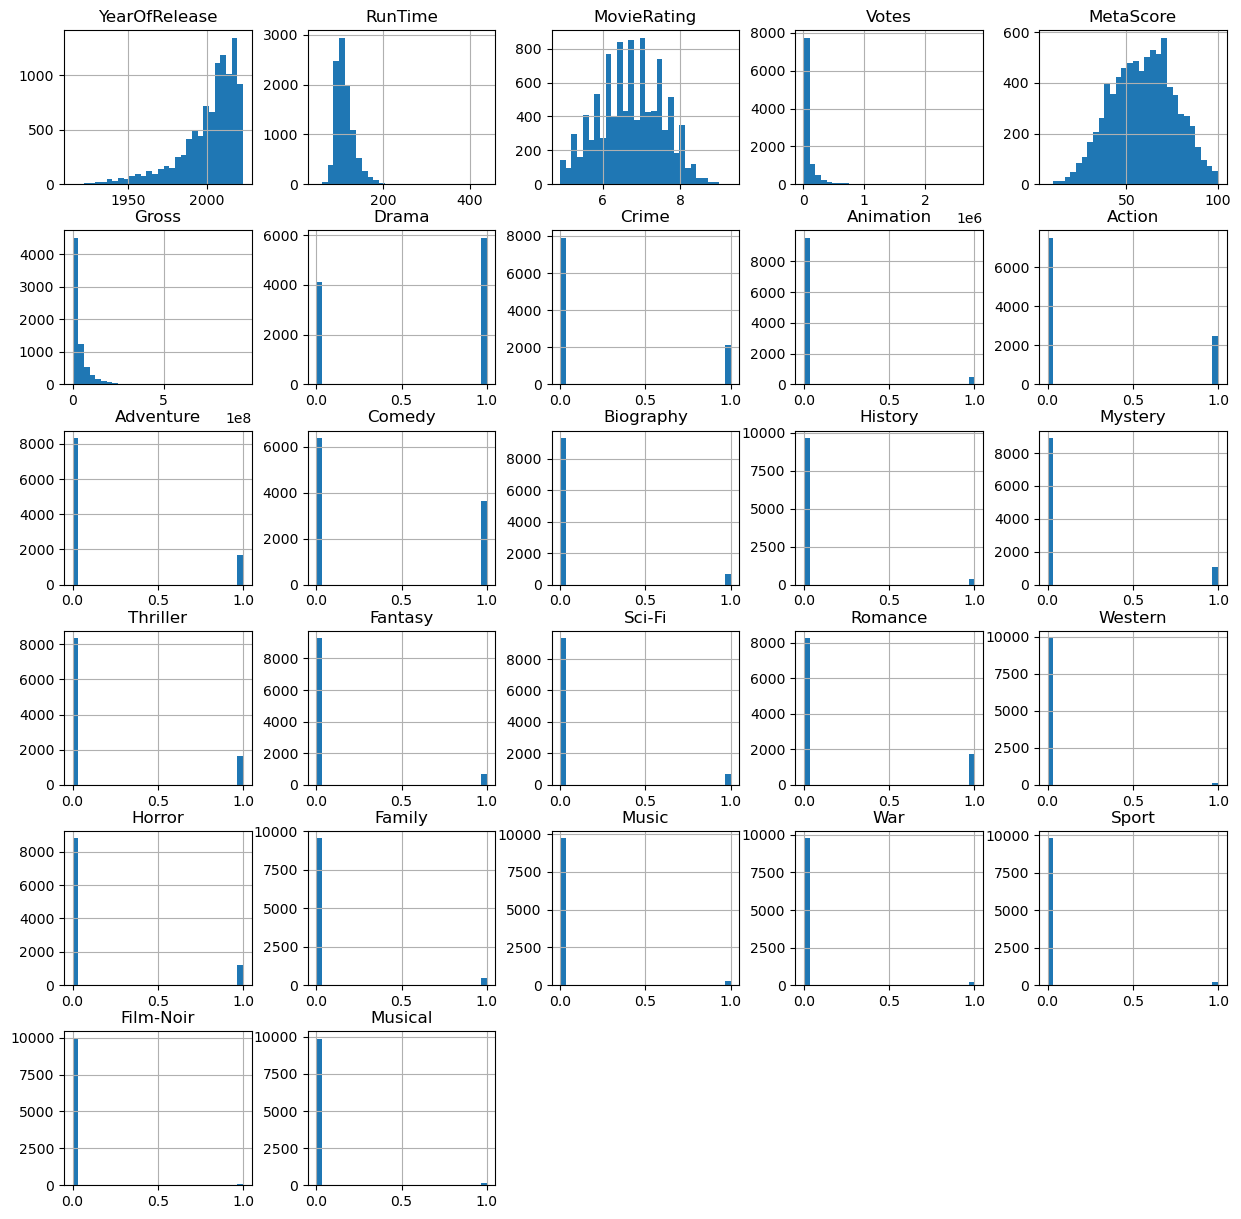

In [57]:
df.hist(bins=30, figsize=(15, 15))
plt.show()

C:\Users\Gheal\AppData\Local\Temp\ipykernel_2292\104257821.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



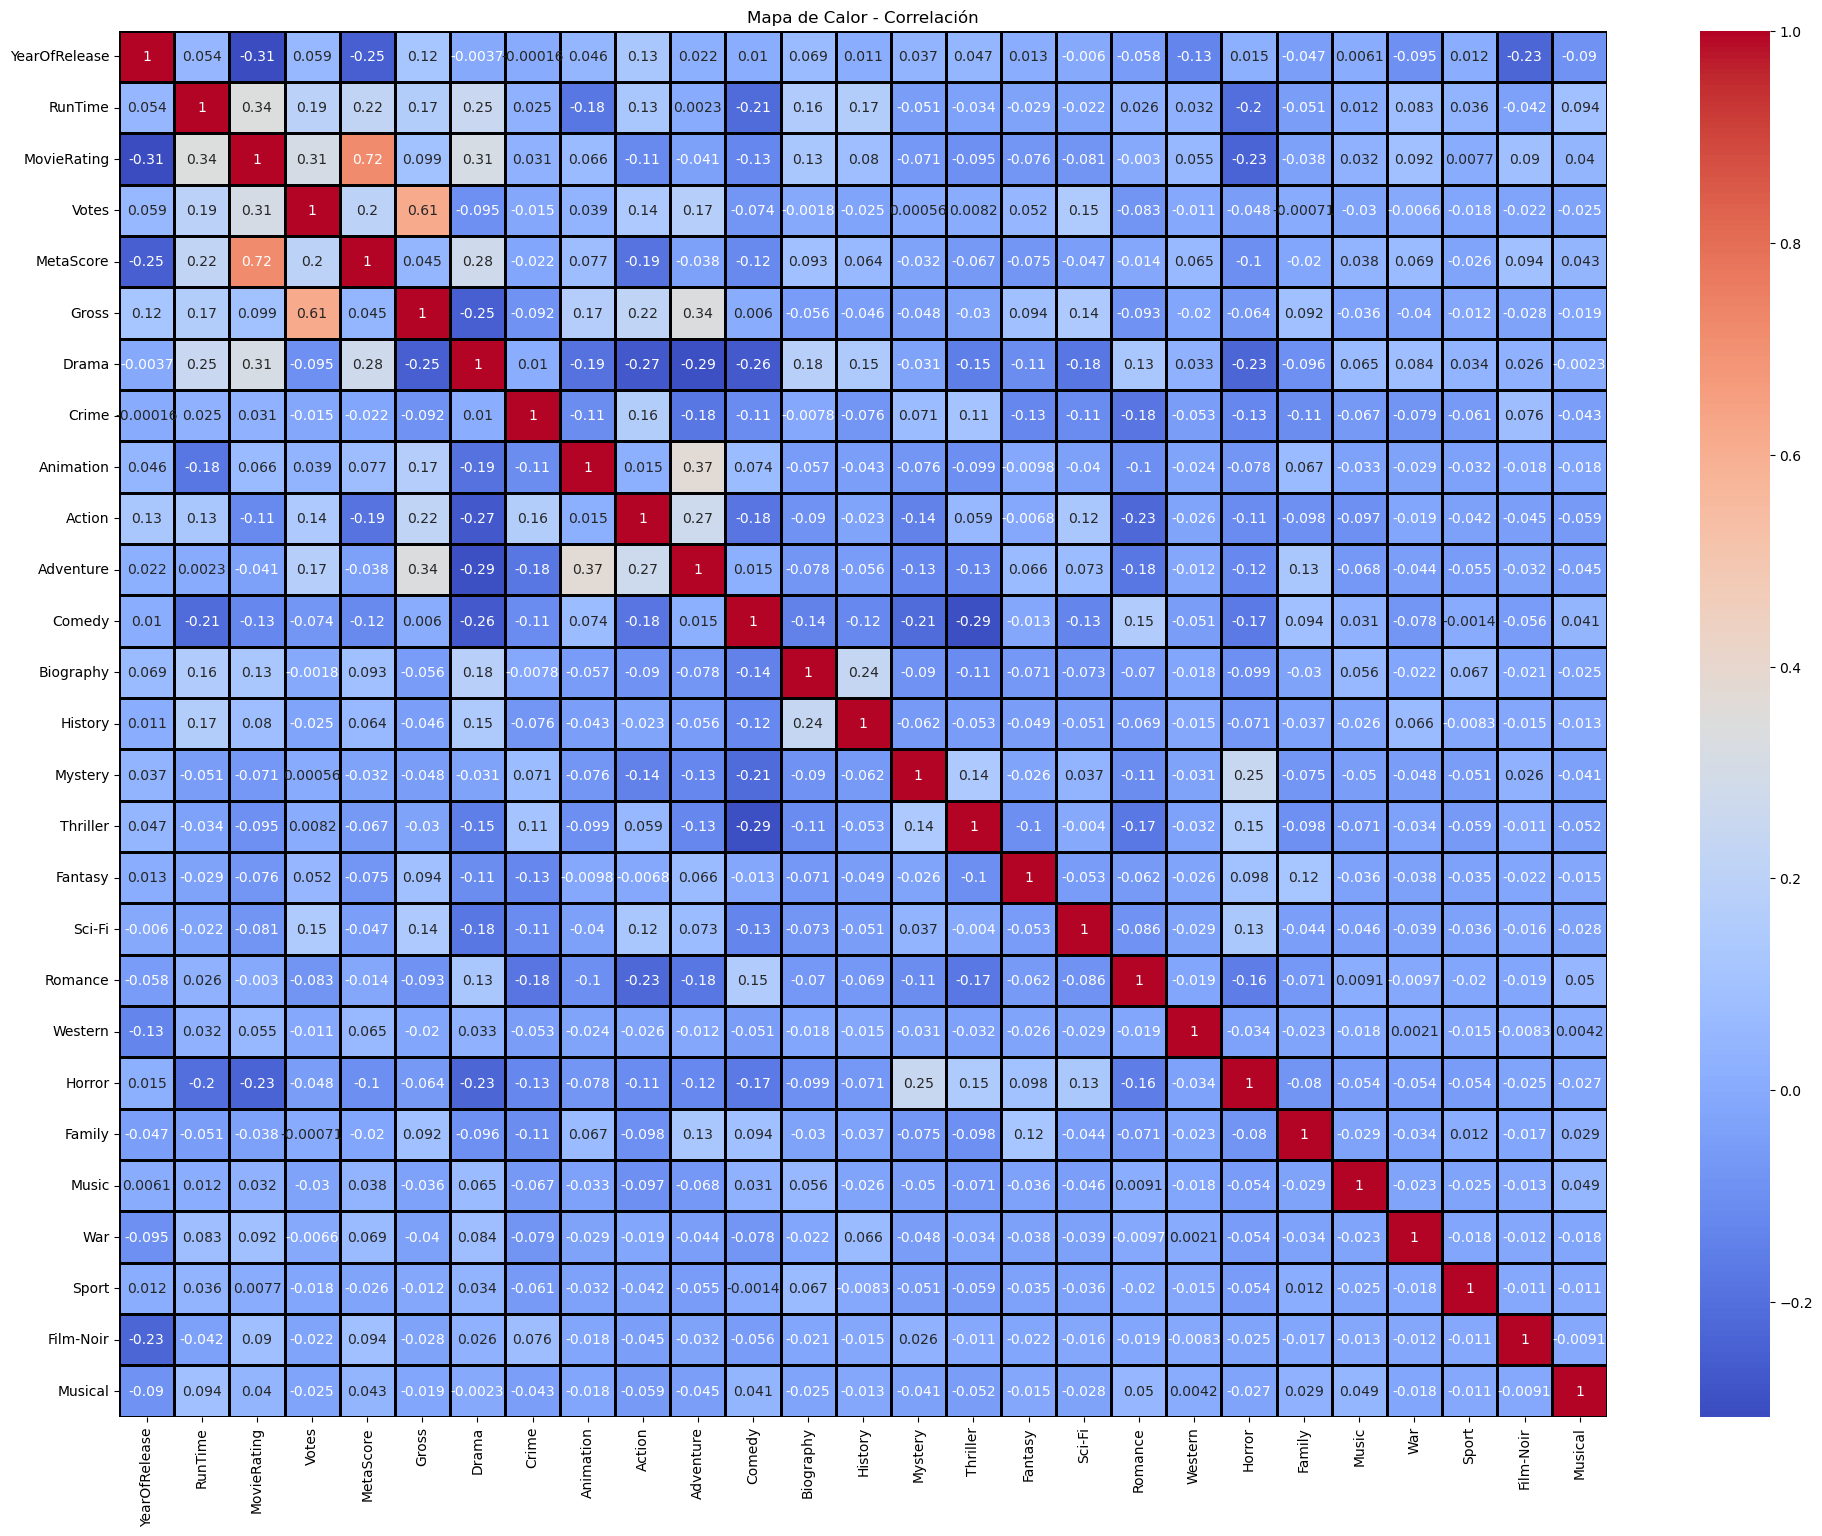

In [58]:
corr_matrix = df.corr()
plt.figure(figsize=(24, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=1, linecolor='black')
plt.title("Mapa de Calor - Correlación")
plt.show()

A partir de esta matriz de correlación podemos decir que para nuestra variable objetivo "Gross":
- YearOfRelease tiene una débil pero considerable relación con la variable objetivo.
- RunTime también tiene una correlación débil pero considerable al fin y al cabo.
- Votes es la característica que más correlación tiene con la variable objetivo, con un importante 0.61

In [59]:
y = df['Gross']

In [60]:
X = df[['YearOfRelease', 'RunTime', 'Votes']]

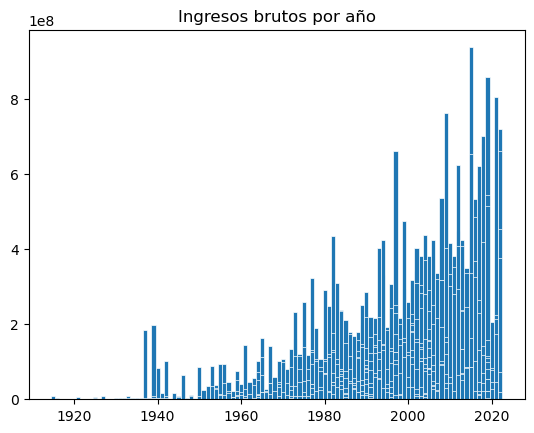

<Figure size 1800x600 with 0 Axes>

In [61]:
fig, ax = plt.subplots()
ax.bar(X['YearOfRelease'], y, width=1, edgecolor="white", linewidth=0.5)
plt.title('Ingresos brutos por año')
plt.figure(figsize=(18,6))
plt.show()

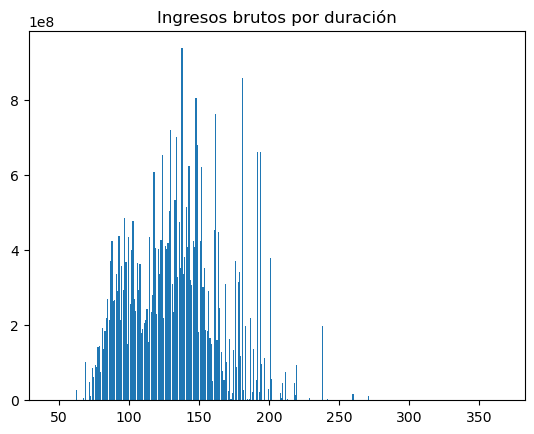

<Figure size 1600x1600 with 0 Axes>

In [62]:
fig, ax = plt.subplots()
ax.bar(X['RunTime'], y)
plt.title('Ingresos brutos por duración')
plt.figure(figsize=(16,16))
plt.show()

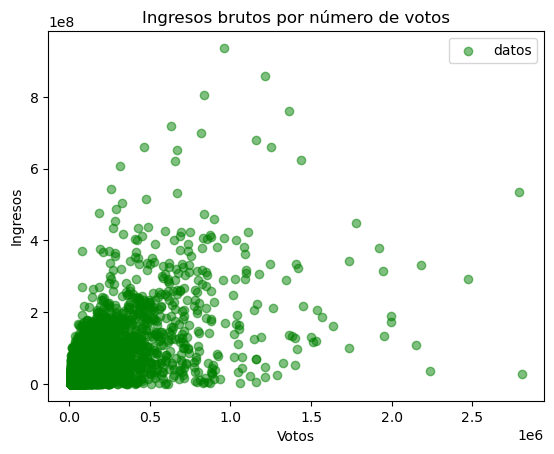

In [63]:
fig, ax = plt.subplots()
ax.scatter(X['Votes'], y, label="datos", color="green", marker="o", alpha=0.5)
plt.title('Ingresos brutos por número de votos')
plt.xlabel("Votos")
plt.ylabel("Ingresos")
plt.legend()
plt.show()

# Preprocesamiento de los datos

# Imputación de datos

In [33]:
from sklearn.linear_model import LinearRegression

# Dividir el DataFrame en dos partes: una con valores nulos y otra sin valores nulos
df_notnull = df.dropna()
df_isnull = df[df['MetaScore'].isnull()]

# Crear un modelo de regresión lineal para MetaScore segun matriz de correlación (0.72 con MovieRating)
model = LinearRegression()
X = df_notnull[['MovieRating']]
y = df_notnull['MetaScore']
model.fit(X, y)

# Predecir los valores nulos utilizando el modelo de regresión
X_pred = df_isnull[['MovieRating']]
y_pred = model.predict(X_pred)

# Actualizar el DataFrame original con los valores predichos
df.loc[df['MetaScore'].isnull(), 'MetaScore'] = y_pred

# Imprimir el DataFrame actualizado
df

,MovieName,YearOfRelease,RunTime,MovieRating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,The Shawshank Redemption,1994,142,9.3,2804443,82.000000,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton', 'William Sadler']","['Over', 'the', 'course', 'of', 'several', 'years,', 'two', 'convicts', 'form', 'a', 'friendship,', 'seeking', 'consolation', 'and,', 'eventually,', 'redemption', 'through', 'basic', 'compassion.']"
1,The Godfather,1972,175,9.2,1954174,100.000000,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', 'Diane Keaton']","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a', 'mafia', 'family,', 'decides', 'to', 'hand', 'over', 'his', 'empire', 'to', 'his', 'youngest', 'son', 'Michael.', 'However,', 'his', 'decision', 'unintentionally', 'puts', 'the', 'lives', 'of', 'his', 'loved', 'ones', 'in', 'grave', 'danger.']"
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,98.513391,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yago Sako', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman', 'Rael Padamsee']","['An', 'anime', 'adaptation', 'of', 'the', 'Hindu', 'epic', 'the', 'Ramayana,', 'where', 'Lord', 'Ram', 'combats', 'the', 'wicked', 'king', 'Ravana.']"
3,The Chaos Class,1975,87,9.2,42231,98.513391,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Munir Ozkul', 'Halit Akcatepe', 'Tarik Akan']","['Lazy,', 'uneducated', 'students', 'share', 'a', 'very', 'close', 'bond.', 'They', 'live', 'together', 'in', 'the', 'dormitory,', 'where', 'they', 'plan', 'their', 'latest', 'pranks.', 'When', 'a', 'new', 'headmaster', 'arrives,', 'the', 'students', 'naturally', 'try', 'to', 'overthrow', 'him.', 'A', 'comic', 'war', 'of', 'nitwits', 'follows.']"
4,The Dark Knight,2008,152,9.0,2786129,84.000000,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckhart', 'Michael Caine']","['When', 'the', 'menace', 'known', 'as', 'the', 'Joker', 'wreaks', 'havoc', 'and', 'chaos', 'on', 'the', 'people', 'of', 'Gotham,', 'Batman', 'must', 'accept', 'one', 'of', 'the', 'greatest', 'psychological', 'and', 'physical', 'tests', 'of', 'his', 'ability', 'to', 'fight', 'injustice.']"
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Golmaal Again,2017,140,4.9,10183,30.410691,1010000.0,"['Action', ' Comedy', ' Fantasy']",Not Rated,['Rohit Shetty'],"['Ajay Devgn', 'Arshad Warsi', 'Tabu', 'Shreyas Talpade']","['The', 'gang', 'encounters', 'with', 'some', 'spiritual', 'bodies', 'and', 'finds', 'out', 'the', 'truth', 'about', 'the', 'Jamnadas', 'Orphanage', 'where', 'they', 'were', 'brought', 'up.']"
9996,Not to Forget,2021,84,4.9,11191,30.410691,NaN,['Drama'],NaN,['Valerio Zanoli'],"['Karen Grassle', 'Louis Gossett Jr.', ""Tatum O'Neal"", 'Cloris Leachman']","['After', 'a', 'lifetime', 'of', 'scams,', 'a', 'self-centered', 'millennial', 'is', 'sentenced', 'to', 'take', 'care', 'of', 'his', 'grandmother,', 'who', 'suffers', 'from', ""Alzheimer's.""]"
9997,Housefull 3,2016,140,4.9,10308,30.410691,1160000.0,"['Action', ' Comedy', ' Romance']",Not Rated,"['Sajid', 'Farhad Samji']","['Akshay Kumar', 'Abhishek Bachchan', 'Riteish Deshmukh', 'Jackie Shroff']","['A', 'father', ""doesn't"", 'want', 'his', 'three', 'daughters', 'to', 'get', 'married.', 'Now,', ""it's"", 'up', 'to', 'three', 'men', 'to', 'try', 'to', 'and', 'convince', 'the', 'father', 'that', ""they're"", 'a', 'good', 'fit', 'for', 'his', 'daughters.']"
9998,A.I. Rising,2018,85,4.9,11187,30.410691,NaN,"['Drama', ' Romance', ' Sci-Fi']",R,['Lazar Bodroza'],"['Sebastian Cavazza', 'Stoya', 'Marusa Majer', 'Kirsty Besterman']","['An', 'intimate', 'relationship', 'between', 'a', 'human', 'and', 'an', 'android', 'tests', 'the', 'boundaries', 'of', 'human', 'nature.']"


In [145]:
from sklearn.linear_model import LinearRegression


# Dividir el DataFrame en dos partes: una con valores nulos y otra sin valores nulos
df_notnull2 = df.dropna()
df_isnull2 = df[df['Gross'].isnull()]

# Crear un modelo de regresión lineal 
model2 = LinearRegression()
X = df_notnull2[['Votes']]
y = df_notnull2['Gross']
model2.fit(X, y)

# Predecir los valores nulos utilizando el modelo de regresión
X_pred = df_isnull2[['Votes']]
y_pred = model2.predict(X_pred)

# Actualizar el DataFrame original con los valores predichos
df.loc[df['Gross'].isnull(), 'Gross'] = y_pred

# Imprimir el DataFrame actualizado
df

,MovieName,YearOfRelease,RunTime,MovieRating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,The Shawshank Redemption,1994,142,9.3,2804443,82.000000,2.834000e+07,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton', 'William Sadler']","['Over', 'the', 'course', 'of', 'several', 'years,', 'two', 'convicts', 'form', 'a', 'friendship,', 'seeking', 'consolation', 'and,', 'eventually,', 'redemption', 'through', 'basic', 'compassion.']"
1,The Godfather,1972,175,9.2,1954174,100.000000,1.349700e+08,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', 'Diane Keaton']","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a', 'mafia', 'family,', 'decides', 'to', 'hand', 'over', 'his', 'empire', 'to', 'his', 'youngest', 'son', 'Michael.', 'However,', 'his', 'decision', 'unintentionally', 'puts', 'the', 'lives', 'of', 'his', 'loved', 'ones', 'in', 'grave', 'danger.']"
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,98.513391,1.827177e+07,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yago Sako', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman', 'Rael Padamsee']","['An', 'anime', 'adaptation', 'of', 'the', 'Hindu', 'epic', 'the', 'Ramayana,', 'where', 'Lord', 'Ram', 'combats', 'the', 'wicked', 'king', 'Ravana.']"
3,The Chaos Class,1975,87,9.2,42231,98.513391,2.442502e+07,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Munir Ozkul', 'Halit Akcatepe', 'Tarik Akan']","['Lazy,', 'uneducated', 'students', 'share', 'a', 'very', 'close', 'bond.', 'They', 'live', 'together', 'in', 'the', 'dormitory,', 'where', 'they', 'plan', 'their', 'latest', 'pranks.', 'When', 'a', 'new', 'headmaster', 'arrives,', 'the', 'students', 'naturally', 'try', 'to', 'overthrow', 'him.', 'A', 'comic', 'war', 'of', 'nitwits', 'follows.']"
4,The Dark Knight,2008,152,9.0,2786129,84.000000,5.348600e+08,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckhart', 'Michael Caine']","['When', 'the', 'menace', 'known', 'as', 'the', 'Joker', 'wreaks', 'havoc', 'and', 'chaos', 'on', 'the', 'people', 'of', 'Gotham,', 'Batman', 'must', 'accept', 'one', 'of', 'the', 'greatest', 'psychological', 'and', 'physical', 'tests', 'of', 'his', 'ability', 'to', 'fight', 'injustice.']"
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Golmaal Again,2017,140,4.9,10183,30.410691,1.010000e+06,"['Action', ' Comedy', ' Fantasy']",Not Rated,['Rohit Shetty'],"['Ajay Devgn', 'Arshad Warsi', 'Tabu', 'Shreyas Talpade']","['The', 'gang', 'encounters', 'with', 'some', 'spiritual', 'bodies', 'and', 'finds', 'out', 'the', 'truth', 'about', 'the', 'Jamnadas', 'Orphanage', 'where', 'they', 'were', 'brought', 'up.']"
9996,Not to Forget,2021,84,4.9,11191,30.410691,1.789209e+07,['Drama'],NaN,['Valerio Zanoli'],"['Karen Grassle', 'Louis Gossett Jr.', ""Tatum O'Neal"", 'Cloris Leachman']","['After', 'a', 'lifetime', 'of', 'scams,', 'a', 'self-centered', 'millennial', 'is', 'sentenced', 'to', 'take', 'care', 'of', 'his', 'grandmother,', 'who', 'suffers', 'from', ""Alzheimer's.""]"
9997,Housefull 3,2016,140,4.9,10308,30.410691,1.160000e+06,"['Action', ' Comedy', ' Romance']",Not Rated,"['Sajid', 'Farhad Samji']","['Akshay Kumar', 'Abhishek Bachchan', 'Riteish Deshmukh', 'Jackie Shroff']","['A', 'father', ""doesn't"", 'want', 'his', 'three', 'daughters', 'to', 'get', 'married.', 'Now,', ""it's"", 'up', 'to', 'three', 'men', 'to', 'try', 'to', 'and', 'convince', 'the', 'father', 'that', ""they're"", 'a', 'good', 'fit', 'for', 'his', 'daughters.']"
9998,A.I. Rising,2018,85,4.9,11187,30.410691,1.789124e+07,"['Drama', ' Romance', ' Sci-Fi']",R,['Lazar Bodroza'],"['Sebastian Cavazza', 'Stoya', 'Marusa Majer', 'Kirsty Besterman']","['An', 'intimate', 'relationship', 'between', 'a', 'human', 'and', 'an', 'android', 'tests', 'the', 'boundaries', 'of', 'human', 'nature.']"


In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Separa el conjunto de datos en dos partes: una para entrenar el modelo de clasificación y otra para imputar
df_notnull3 = df.dropna()
df_isnull3 = df[df['Certification'].isnull()]

# Divide las características y la variable objetivo
X_train = df_notnull3[['RunTime']]
y_train = df_notnull3['Certification']

# Entrena un modelo de clasificación (Random Forest, en este caso)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Utiliza el modelo entrenado para predecir los valores categóricos en el conjunto de datos de imputación
X_impute = df_isnull3[['RunTime']]
predicted_values = model.predict(X_impute)

# Reemplaza los valores nulos en el conjunto de datos original con las predicciones del modelo
df.loc[df['Certification'].isnull(), 'Certification'] = predicted_values

df

,MovieName,YearOfRelease,RunTime,MovieRating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,The Shawshank Redemption,1994,142,9.3,2804443,82.000000,2.834000e+07,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton', 'William Sadler']","['Over', 'the', 'course', 'of', 'several', 'years,', 'two', 'convicts', 'form', 'a', 'friendship,', 'seeking', 'consolation', 'and,', 'eventually,', 'redemption', 'through', 'basic', 'compassion.']"
1,The Godfather,1972,175,9.2,1954174,100.000000,1.349700e+08,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', 'Diane Keaton']","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a', 'mafia', 'family,', 'decides', 'to', 'hand', 'over', 'his', 'empire', 'to', 'his', 'youngest', 'son', 'Michael.', 'However,', 'his', 'decision', 'unintentionally', 'puts', 'the', 'lives', 'of', 'his', 'loved', 'ones', 'in', 'grave', 'danger.']"
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,98.513391,1.827177e+07,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yago Sako', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman', 'Rael Padamsee']","['An', 'anime', 'adaptation', 'of', 'the', 'Hindu', 'epic', 'the', 'Ramayana,', 'where', 'Lord', 'Ram', 'combats', 'the', 'wicked', 'king', 'Ravana.']"
3,The Chaos Class,1975,87,9.2,42231,98.513391,2.442502e+07,"['Comedy', ' Drama']",R,['Ertem Egilmez'],"['Kemal Sunal', 'Munir Ozkul', 'Halit Akcatepe', 'Tarik Akan']","['Lazy,', 'uneducated', 'students', 'share', 'a', 'very', 'close', 'bond.', 'They', 'live', 'together', 'in', 'the', 'dormitory,', 'where', 'they', 'plan', 'their', 'latest', 'pranks.', 'When', 'a', 'new', 'headmaster', 'arrives,', 'the', 'students', 'naturally', 'try', 'to', 'overthrow', 'him.', 'A', 'comic', 'war', 'of', 'nitwits', 'follows.']"
4,The Dark Knight,2008,152,9.0,2786129,84.000000,5.348600e+08,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckhart', 'Michael Caine']","['When', 'the', 'menace', 'known', 'as', 'the', 'Joker', 'wreaks', 'havoc', 'and', 'chaos', 'on', 'the', 'people', 'of', 'Gotham,', 'Batman', 'must', 'accept', 'one', 'of', 'the', 'greatest', 'psychological', 'and', 'physical', 'tests', 'of', 'his', 'ability', 'to', 'fight', 'injustice.']"
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Golmaal Again,2017,140,4.9,10183,30.410691,1.010000e+06,"['Action', ' Comedy', ' Fantasy']",Not Rated,['Rohit Shetty'],"['Ajay Devgn', 'Arshad Warsi', 'Tabu', 'Shreyas Talpade']","['The', 'gang', 'encounters', 'with', 'some', 'spiritual', 'bodies', 'and', 'finds', 'out', 'the', 'truth', 'about', 'the', 'Jamnadas', 'Orphanage', 'where', 'they', 'were', 'brought', 'up.']"
9996,Not to Forget,2021,84,4.9,11191,30.410691,1.789209e+07,['Drama'],R,['Valerio Zanoli'],"['Karen Grassle', 'Louis Gossett Jr.', ""Tatum O'Neal"", 'Cloris Leachman']","['After', 'a', 'lifetime', 'of', 'scams,', 'a', 'self-centered', 'millennial', 'is', 'sentenced', 'to', 'take', 'care', 'of', 'his', 'grandmother,', 'who', 'suffers', 'from', ""Alzheimer's.""]"
9997,Housefull 3,2016,140,4.9,10308,30.410691,1.160000e+06,"['Action', ' Comedy', ' Romance']",Not Rated,"['Sajid', 'Farhad Samji']","['Akshay Kumar', 'Abhishek Bachchan', 'Riteish Deshmukh', 'Jackie Shroff']","['A', 'father', ""doesn't"", 'want', 'his', 'three', 'daughters', 'to', 'get', 'married.', 'Now,', ""it's"", 'up', 'to', 'three', 'men', 'to', 'try', 'to', 'and', 'convince', 'the', 'father', 'that', ""they're"", 'a', 'good', 'fit', 'for', 'his', 'daughters.']"
9998,A.I. Rising,2018,85,4.9,11187,30.410691,1.789124e+07,"['Drama', ' Romance', ' Sci-Fi']",R,['Lazar Bodroza'],"['Sebastian Cavazza', 'Stoya', 'Marusa Majer', 'Kirsty Besterman']","['An', 'intimate', 'relationship', 'between', 'a', 'human', 'and', 'an', 'android', 'tests', 'the', 'boundaries', 'of', 'human', 'nature.']"


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix

# Separar el conjunto de datos en tres partes: entrenamiento, validación e imputación
train_data, val_data = train_test_split(df.dropna(subset=['Certification']), test_size=0.2, random_state=0)
impute_data = df[df['Certification'].isnull()]

# Dividir características y variable objetivo
X_train = train_data[['Votes','RunTime','Drama', 'Crime', 'Animation', 'Action', 'Adventure', 'Comedy', 'Biography', 'History', 'Mystery', 'Thriller', 'Fantasy', 'Sci-Fi', 'Romance', 'Western', 'Horror', 'Family', 'Music', 'War', 'Sport', 'Film-Noir', 'Musical']]
y_train = train_data['Certification']

X_val = val_data[['Votes','RunTime','Drama', 'Crime', 'Animation', 'Action', 'Adventure', 'Comedy', 'Biography', 'History', 'Mystery', 'Thriller', 'Fantasy', 'Sci-Fi', 'Romance', 'Western', 'Horror', 'Family', 'Music', 'War', 'Sport', 'Film-Noir', 'Musical']]
y_val = val_data['Certification']

X_impute = impute_data[['Votes','RunTime','Drama', 'Crime', 'Animation', 'Action', 'Adventure', 'Comedy', 'Biography', 'History', 'Mystery', 'Thriller', 'Fantasy', 'Sci-Fi', 'Romance', 'Western', 'Horror', 'Family', 'Music', 'War', 'Sport', 'Film-Noir', 'Musical']]

# Escalar características para mejorar el rendimiento del SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_impute_scaled = scaler.transform(X_impute)

# Entrenar el modelo SVM con un kernel RBF
svm_model = SVC(kernel='rbf', gamma='auto')
svm_model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de validación
val_predictions = svm_model.predict(X_val_scaled)

# Evaluar el modelo en el conjunto de validación con Recall y Precisión
recall = recall_score(y_val, val_predictions, average='weighted')
precision = precision_score(y_val, val_predictions, average='weighted')

print(f'Recall en conjunto de validación: {recall}')
print(f'Precisión en conjunto de validación: {precision}')

# Evaluar el modelo en el conjunto de validación con matriz de confusión
conf_matrix = confusion_matrix(y_val, val_predictions)
print("Matriz de Confusión en conjunto de validación:")
print(conf_matrix)


# Realizar predicciones en el conjunto de imputación
impute_predictions = svm_model.predict(X_impute_scaled)

# Reemplazar los valores nulos en el DataFrame original con las predicciones del modelo
df.loc[df['Certification'].isnull(), 'Certification'] = impute_predictions

df

C:\Users\Gheal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall en conjunto de validación: 0.5526725480020758
Precisión en conjunto de validación: 0.5523606747509019
Matriz de Confusión en conjunto de validación:
[[  0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   1   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    0]
 [  0   0   0   2   0   0   0   0   0   2   2   4  11   0   0   0   0   0
    0]
 [  0   0   0   0   8   0   0   0   3  23   4   0   6   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   5   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0  46   9  16   8 160   0   0   0   0   0
    0]
 [  0   0   0   0   1   0   0   0   3 117  53   2  93   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0 

,MovieName,YearOfRelease,RunTime,MovieRating,Votes,MetaScore,Gross,Genre,Certification,Director,...,Sci-Fi,Romance,Western,Horror,Family,Music,War,Sport,Film-Noir,Musical
0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,[Drama],R,['Frank Darabont'],...,0,0,0,0,0,0,0,0,0,0
1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"[Crime, Drama]",R,['Francis Ford Coppola'],...,0,0,0,0,0,0,0,0,0,0
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"[Animation, Action, Adventure]",PG,"['Ram Mohan', 'Yago Sako', 'Koichi Saski']",...,0,0,0,0,0,0,0,0,0,0
3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"[Comedy, Drama]",R,['Ertem Egilmez'],...,0,0,0,0,0,0,0,0,0,0
4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"[Action, Crime, Drama]",PG-13,['Christopher Nolan'],...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Golmaal Again,2017,140,4.9,10183,NaN,1010000.0,"[Action, Comedy, Fantasy]",Not Rated,['Rohit Shetty'],...,0,0,0,0,0,0,0,0,0,0
9996,Not to Forget,2021,84,4.9,11191,NaN,NaN,[Drama],R,['Valerio Zanoli'],...,0,0,0,0,0,0,0,0,0,0
9997,Housefull 3,2016,140,4.9,10308,NaN,1160000.0,"[Action, Comedy, Romance]",Not Rated,"['Sajid', 'Farhad Samji']",...,0,1,0,0,0,0,0,0,0,0
9998,A.I. Rising,2018,85,4.9,11187,NaN,NaN,"[Drama, Romance, Sci-Fi]",R,['Lazar Bodroza'],...,1,1,0,0,0,0,0,0,0,0


In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import recall_score, precision_score

# Separar el conjunto de datos en tres partes: entrenamiento, validación e imputación
train_data, val_data = train_test_split(df.dropna(subset=['Certification']), test_size=0.2, random_state=0)
impute_data = df[df['Certification'].isnull()]

# Dividir características y variable objetivo
X_train = train_data[['Votes','RunTime','Drama', 'Crime', 'Animation', 'Action', 'Adventure', 'Comedy', 'Biography', 'History', 'Mystery', 'Thriller', 'Fantasy', 'Sci-Fi', 'Romance', 'Western', 'Horror', 'Family', 'Music', 'War', 'Sport', 'Film-Noir', 'Musical']]
y_train = train_data['Certification']

X_val = val_data[['Votes','RunTime','Drama', 'Crime', 'Animation', 'Action', 'Adventure', 'Comedy', 'Biography', 'History', 'Mystery', 'Thriller', 'Fantasy', 'Sci-Fi', 'Romance', 'Western', 'Horror', 'Family', 'Music', 'War', 'Sport', 'Film-Noir', 'Musical']]
y_val = val_data['Certification']

X_impute = impute_data[['Votes','RunTime','Drama', 'Crime', 'Animation', 'Action', 'Adventure', 'Comedy', 'Biography', 'History', 'Mystery', 'Thriller', 'Fantasy', 'Sci-Fi', 'Romance', 'Western', 'Horror', 'Family', 'Music', 'War', 'Sport', 'Film-Noir', 'Musical']]

# Entrenar el modelo de árboles de decisión
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
val_predictions = decision_tree_model.predict(X_val)

# Evaluar el modelo en el conjunto de validación con Recall y Precisión
recall = recall_score(y_val, val_predictions, average='weighted')
precision = precision_score(y_val, val_predictions, average='weighted')

print(f'Recall en conjunto de validación: {recall}')
print(f'Precisión en conjunto de validación: {precision}')

# Evaluar el modelo en el conjunto de validación con matriz de confusión
conf_matrix = confusion_matrix(y_val, val_predictions)

print("Matriz de Confusión en conjunto de validación:")
print(conf_matrix)

# Realizar predicciones en el conjunto de imputación
impute_predictions = decision_tree_model.predict(X_impute)

# Reemplazar los valores nulos en el DataFrame original con las predicciones del modelo
df.loc[df['Certification'].isnull(), 'Certification'] = impute_predictions

df

Recall en conjunto de validación: 0.4047742605085625
Precisión en conjunto de validación: 0.42322710863864327
Matriz de Confusión en conjunto de validación:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   1   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   0]
 [  0   0   0   3   2   0   0   0   0   2   2   4   2   6   0   0   0   0
    0   0]
 [  0   0   0   1   9   0   0   0   0   4  18   7   0   2   1   0   0   2
    0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   1   0   0   1   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   1   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   4   0   0   1   0
    0   0]
 [  0   0   0   6   5   0   1   0   2  74  11  29  10  85   4   0   6   2
    

C:\Users\Gheal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gheal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,MovieName,YearOfRelease,RunTime,MovieRating,Votes,MetaScore,Gross,Genre,Certification,Director,...,Sci-Fi,Romance,Western,Horror,Family,Music,War,Sport,Film-Noir,Musical
0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,[Drama],R,['Frank Darabont'],...,0,0,0,0,0,0,0,0,0,0
1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"[Crime, Drama]",R,['Francis Ford Coppola'],...,0,0,0,0,0,0,0,0,0,0
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"[Animation, Action, Adventure]",PG,"['Ram Mohan', 'Yago Sako', 'Koichi Saski']",...,0,0,0,0,0,0,0,0,0,0
3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"[Comedy, Drama]",R,['Ertem Egilmez'],...,0,0,0,0,0,0,0,0,0,0
4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"[Action, Crime, Drama]",PG-13,['Christopher Nolan'],...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Golmaal Again,2017,140,4.9,10183,NaN,1010000.0,"[Action, Comedy, Fantasy]",Not Rated,['Rohit Shetty'],...,0,0,0,0,0,0,0,0,0,0
9996,Not to Forget,2021,84,4.9,11191,NaN,NaN,[Drama],Unrated,['Valerio Zanoli'],...,0,0,0,0,0,0,0,0,0,0
9997,Housefull 3,2016,140,4.9,10308,NaN,1160000.0,"[Action, Comedy, Romance]",Not Rated,"['Sajid', 'Farhad Samji']",...,0,1,0,0,0,0,0,0,0,0
9998,A.I. Rising,2018,85,4.9,11187,NaN,NaN,"[Drama, Romance, Sci-Fi]",R,['Lazar Bodroza'],...,1,1,0,0,0,0,0,0,0,0


In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

# Separar el conjunto de datos en tres partes: entrenamiento, validación e imputación
train_data, val_data = train_test_split(df.dropna(subset=['Certification']), test_size=0.2, random_state=0)
impute_data = df[df['Certification'].isnull()]

# Dividir características y variable objetivo
X_train = train_data[['Votes','RunTime','Drama', 'Crime', 'Animation', 'Action', 'Adventure', 'Comedy', 'Biography', 'History', 'Mystery', 'Thriller', 'Fantasy', 'Sci-Fi', 'Romance', 'Western', 'Horror', 'Family', 'Music', 'War', 'Sport', 'Film-Noir', 'Musical']]
y_train = train_data['Certification']

X_val = val_data[['Votes','RunTime','Drama', 'Crime', 'Animation', 'Action', 'Adventure', 'Comedy', 'Biography', 'History', 'Mystery', 'Thriller', 'Fantasy', 'Sci-Fi', 'Romance', 'Western', 'Horror', 'Family', 'Music', 'War', 'Sport', 'Film-Noir', 'Musical']]
y_val = val_data['Certification']

X_impute = impute_data[['Votes','RunTime','Drama', 'Crime', 'Animation', 'Action', 'Adventure', 'Comedy', 'Biography', 'History', 'Mystery', 'Thriller', 'Fantasy', 'Sci-Fi', 'Romance', 'Western', 'Horror', 'Family', 'Music', 'War', 'Sport', 'Film-Noir', 'Musical']]

# Escalar características para mejorar el rendimiento de la regresión logística
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_impute_scaled = scaler.transform(X_impute)

# Entrenar un modelo de regresión logística
logistic_model = LogisticRegression(random_state=42, multi_class='ovr')
logistic_model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de validación
val_predictions = logistic_model.predict(X_val_scaled)

# Evaluar el modelo en el conjunto de validación con matriz de confusión, precisión y recall
conf_matrix = confusion_matrix(y_val, val_predictions)
precision = precision_score(y_val, val_predictions, average='weighted')
recall = recall_score(y_val, val_predictions, average='weighted')

print("Matriz de Confusión en conjunto de validación:")
print(conf_matrix)
print(f'Precisión en conjunto de validación: {precision}')
print(f'Recall en conjunto de validación: {recall}')

# Realizar predicciones en el conjunto de imputación
impute_predictions = logistic_model.predict(X_impute_scaled)

# Reemplazar los valores nulos en el DataFrame original con las predicciones del modelo
df.loc[df['Certification'].isnull(), 'Certification'] = impute_predictions

df

Matriz de Confusión en conjunto de validación:
[[  0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   1   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    0]
 [  0   0   0   1   0   0   0   0   0   2   1   5  12   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   2  29   8   2   3   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   2   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   2   0   0   0   4   0   0   0   0   0
    0]
 [  0   0   0   2   0   0   0   0  49   9  15   3 161   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   9 114  64   2  80   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   9   5 150   1 231   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   1   5   6  14   0   0 

C:\Users\Gheal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,MovieName,YearOfRelease,RunTime,MovieRating,Votes,MetaScore,Gross,Genre,Certification,Director,...,Sci-Fi,Romance,Western,Horror,Family,Music,War,Sport,Film-Noir,Musical
0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,[Drama],R,['Frank Darabont'],...,0,0,0,0,0,0,0,0,0,0
1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"[Crime, Drama]",R,['Francis Ford Coppola'],...,0,0,0,0,0,0,0,0,0,0
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"[Animation, Action, Adventure]",PG,"['Ram Mohan', 'Yago Sako', 'Koichi Saski']",...,0,0,0,0,0,0,0,0,0,0
3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"[Comedy, Drama]",R,['Ertem Egilmez'],...,0,0,0,0,0,0,0,0,0,0
4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"[Action, Crime, Drama]",PG-13,['Christopher Nolan'],...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Golmaal Again,2017,140,4.9,10183,NaN,1010000.0,"[Action, Comedy, Fantasy]",Not Rated,['Rohit Shetty'],...,0,0,0,0,0,0,0,0,0,0
9996,Not to Forget,2021,84,4.9,11191,NaN,NaN,[Drama],R,['Valerio Zanoli'],...,0,0,0,0,0,0,0,0,0,0
9997,Housefull 3,2016,140,4.9,10308,NaN,1160000.0,"[Action, Comedy, Romance]",Not Rated,"['Sajid', 'Farhad Samji']",...,0,1,0,0,0,0,0,0,0,0
9998,A.I. Rising,2018,85,4.9,11187,NaN,NaN,"[Drama, Romance, Sci-Fi]",R,['Lazar Bodroza'],...,1,1,0,0,0,0,0,0,0,0


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


# Separar el conjunto de datos en tres partes: entrenamiento, validación e imputación
train_data, val_data = train_test_split(df.dropna(subset=['Certification']), test_size=0.2, random_state=0)
impute_data = df[df['Certification'].isnull()]

# Dividir características y variable objetivo
X_train = train_data[['Votes','RunTime','Drama', 'Crime', 'Animation', 'Action', 'Adventure', 'Comedy', 'Biography', 'History', 'Mystery', 'Thriller', 'Fantasy', 'Sci-Fi', 'Romance', 'Western', 'Horror', 'Family', 'Music', 'War', 'Sport', 'Film-Noir', 'Musical']]
y_train = train_data['Certification']

X_val = val_data[['Votes','RunTime','Drama', 'Crime', 'Animation', 'Action', 'Adventure', 'Comedy', 'Biography', 'History', 'Mystery', 'Thriller', 'Fantasy', 'Sci-Fi', 'Romance', 'Western', 'Horror', 'Family', 'Music', 'War', 'Sport', 'Film-Noir', 'Musical']]
y_val = val_data['Certification']

X_impute = impute_data[['Votes','RunTime','Drama', 'Crime', 'Animation', 'Action', 'Adventure', 'Comedy', 'Biography', 'History', 'Mystery', 'Thriller', 'Fantasy', 'Sci-Fi', 'Romance', 'Western', 'Horror', 'Family', 'Music', 'War', 'Sport', 'Film-Noir', 'Musical']]

# Escalar características para mejorar el rendimiento del SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_impute_scaled = scaler.transform(X_impute)

# Configurar la estrategia de imputación para valores nulos
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_val_imputed = imputer.transform(X_val_scaled)
X_impute_imputed = imputer.transform(X_impute_scaled)

# Definir los parámetros para GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto'], 'kernel': ['rbf', 'linear']}

# Inicializar y ajustar el modelo SVM utilizando GridSearchCV
svm = SVC()
svm_grid = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy')
svm_grid.fit(X_train_imputed, y_train)

# Obtener la mejor combinación de hiperparámetros
best_params = svm_grid.best_params_

# Entrenar el modelo SVM con la mejor combinación de hiperparámetros
best_svm = SVC(**best_params)
best_svm.fit(X_train_imputed, y_train)

# Realizar predicciones en el conjunto de validación
val_predictions = best_svm.predict(X_val_imputed)

# Evaluar el modelo en el conjunto de validación con matriz de confusión, precisión y recall
conf_matrix = confusion_matrix(y_val, val_predictions)
precision = precision_score(y_val, val_predictions, average='weighted')
recall = recall_score(y_val, val_predictions, average='weighted')

print("Matriz de Confusión en conjunto de validación:")
print(conf_matrix)
print(f'Precisión en conjunto de validación: {precision}')
print(f'Recall en conjunto de validación: {recall}')

# Realizar predicciones en el conjunto de imputación
impute_predictions = best_svm.predict(X_impute_imputed)

# Reemplazar los valores nulos en el DataFrame original con las predicciones del modelo
df.loc[df['Certification'].isnull(), 'Certification'] = impute_predictions

df

C:\Users\Gheal\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\Gheal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Matriz de Confusión en conjunto de validación:
[[  0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   1   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    0]
 [  0   0   0   2   0   0   0   0   0   2   2   4  11   0   0   0   0   0
    0]
 [  0   0   0   0   8   0   0   0   3  23   4   0   6   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   5   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0  46   9  16   8 160   0   0   0   0   0
    0]
 [  0   0   0   0   1   0   0   0   3 117  53   2  93   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   6   7 162   2 219   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   7   7  12   0   0 

,MovieName,YearOfRelease,RunTime,MovieRating,Votes,MetaScore,Gross,Genre,Certification,Director,...,Sci-Fi,Romance,Western,Horror,Family,Music,War,Sport,Film-Noir,Musical
0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,[Drama],R,['Frank Darabont'],...,0,0,0,0,0,0,0,0,0,0
1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"[Crime, Drama]",R,['Francis Ford Coppola'],...,0,0,0,0,0,0,0,0,0,0
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"[Animation, Action, Adventure]",PG,"['Ram Mohan', 'Yago Sako', 'Koichi Saski']",...,0,0,0,0,0,0,0,0,0,0
3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"[Comedy, Drama]",R,['Ertem Egilmez'],...,0,0,0,0,0,0,0,0,0,0
4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"[Action, Crime, Drama]",PG-13,['Christopher Nolan'],...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Golmaal Again,2017,140,4.9,10183,NaN,1010000.0,"[Action, Comedy, Fantasy]",Not Rated,['Rohit Shetty'],...,0,0,0,0,0,0,0,0,0,0
9996,Not to Forget,2021,84,4.9,11191,NaN,NaN,[Drama],R,['Valerio Zanoli'],...,0,0,0,0,0,0,0,0,0,0
9997,Housefull 3,2016,140,4.9,10308,NaN,1160000.0,"[Action, Comedy, Romance]",Not Rated,"['Sajid', 'Farhad Samji']",...,0,1,0,0,0,0,0,0,0,0
9998,A.I. Rising,2018,85,4.9,11187,NaN,NaN,"[Drama, Romance, Sci-Fi]",R,['Lazar Bodroza'],...,1,1,0,0,0,0,0,0,0,0
